# Milestone 1

- Nama  : Pramudya Adi Nugraha
- Batch : 10
- link heroku : https://pramudya-ftds-001-p0m1.herokuapp.com/

## Description

### Objective

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 0 sebagai berikut:

- Mampu melakukan hypothesis testing terhadap dataset yang diberikan.
- Mampu membuat dashboard interaktif terhadap dataset yang diberikan.
- Mampu mempresentasikan hasil visualisasi data dan temuan.


### Problem Statement

`Write your problem statement here`

## Working Area

### Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

### Data Loading

In [2]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
data['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [4]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [5]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [6]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [7]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Explorasi Data

In [10]:
data_customer = data['Customer type'].value_counts()
data_customer

Member    501
Normal    499
Name: Customer type, dtype: int64

In [11]:
data_male_type = data.query("Gender == 'Male'")[['City', 'Customer type', 'Gender']].value_counts()
data_male_type

City       Customer type  Gender
Yangon     Normal         Male      92
Mandalay   Normal         Male      90
Yangon     Member         Male      87
Mandalay   Member         Male      80
Naypyitaw  Normal         Male      77
           Member         Male      73
dtype: int64

In [12]:
data_female_type = data.query("Gender == 'Female'")[['City', 'Customer type', 'Gender']].value_counts()
data_female_type

City       Customer type  Gender
Naypyitaw  Member         Female    96
Mandalay   Member         Female    85
Naypyitaw  Normal         Female    82
Yangon     Normal         Female    81
           Member         Female    80
Mandalay   Normal         Female    77
dtype: int64

In [13]:
data_male_member_mean = data[
    (data['Gender'] == 'Male') &
    (data['Customer type'] == 'Member')
][['City', 'Customer type', 'Gender']].value_counts().mean()
data_male_member_mean

80.0

In [14]:
data_female_member_mean = data[
    (data['Gender'] == 'Female') &
    (data['Customer type'] == 'Member')
][['City', 'Customer type', 'Gender']].value_counts().mean()
data_female_member_mean

87.0

### Pengeluaran kustomer bertype manakah yang paling besar?

In [15]:
data_customer_total = data[[
    'Customer type',
    'Total'
]]
data_customer_total

,Customer type,Total
0,Member,548.9715
1,Normal,80.2200
2,Normal,340.5255
3,Member,489.0480
4,Normal,634.3785
...,...,...
995,Normal,42.3675
996,Normal,1022.4900
997,Member,33.4320
998,Normal,69.1110


In [16]:
data_customer_total_mean = data.groupby('Customer type')['Total'].mean()
data_customer_total_mean

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64

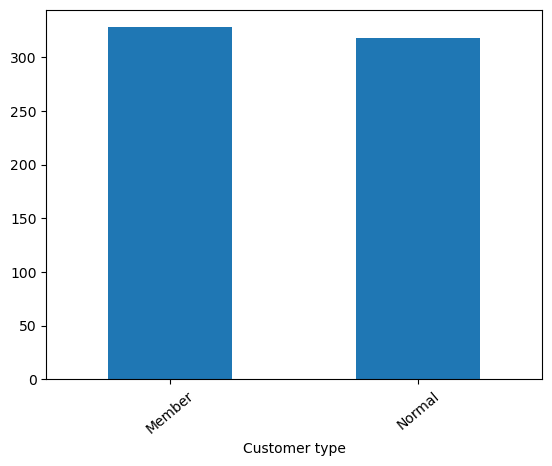

In [17]:
data_customer_total_mean.plot.bar(x = 'Customer type', y = data_customer_total_mean, rot = 40)
plt.show()

### Produk apakah yang paling banyak dibeli oleh kostumer dengan pengeluaran terbanyak?

In [18]:
data_product_customer =  data[
    (data['Customer type'] == 'Member')
][['Customer type', 'Product line']]
data_product_customer

,Customer type,Product line
0,Member,Health and beauty
3,Member,Health and beauty
6,Member,Electronic accessories
8,Member,Health and beauty
9,Member,Food and beverages
...,...,...
988,Member,Electronic accessories
989,Member,Health and beauty
994,Member,Electronic accessories
997,Member,Food and beverages


In [19]:
data_product_customer_value =  data[
    (data['Customer type'] == 'Member')
][['Product line']].value_counts()
data_product_customer_value

Product line          
Food and beverages        94
Sports and travel         87
Fashion accessories       86
Home and lifestyle        83
Electronic accessories    78
Health and beauty         73
dtype: int64

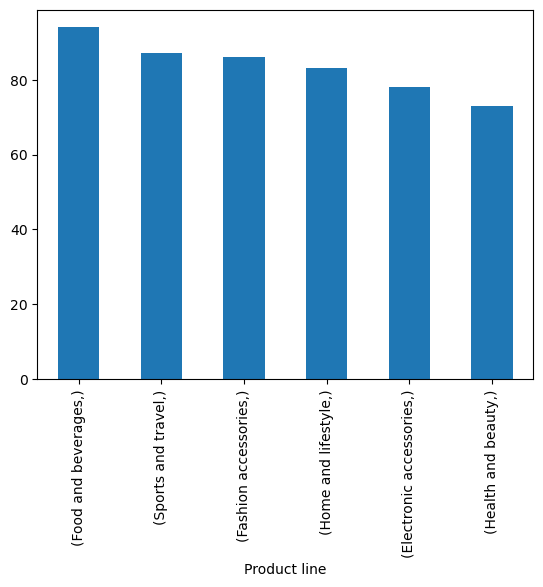

In [20]:
data_product_customer_value.plot.bar(x = 'Product line', y = data_product_customer_value, rot = 90)
plt.show()

### Gender manakah yang lebih banyak kustomer bertype member?

In [21]:
data_male_member = data[
    (data['Gender'] == 'Male') &
    (data['Customer type'] == 'Member')
][['City', 'Customer type', 'Gender']]
data_male_member

,City,Customer type,Gender
3,Yangon,Member,Male
11,Mandalay,Member,Male
20,Naypyitaw,Member,Male
24,Yangon,Member,Male
31,Mandalay,Member,Male
...,...,...,...
980,Naypyitaw,Member,Male
987,Mandalay,Member,Male
988,Naypyitaw,Member,Male
989,Mandalay,Member,Male


In [22]:
data_female_member = data[
    (data['Gender'] == 'Female') &
    (data['Customer type'] == 'Member')
][['City', 'Customer type', 'Gender']]
data_female_member

,City,Customer type,Gender
0,Yangon,Member,Female
6,Yangon,Member,Female
8,Yangon,Member,Female
9,Mandalay,Member,Female
10,Mandalay,Member,Female
...,...,...,...
969,Mandalay,Member,Female
970,Mandalay,Member,Female
982,Yangon,Member,Female
994,Naypyitaw,Member,Female


In [23]:
data_male_member_value = data[
    (data['Gender'] == 'Male') &
    (data['Customer type'] == 'Member')
][['City']].value_counts()
data_male_member_value

City     
Yangon       87
Mandalay     80
Naypyitaw    73
dtype: int64

In [24]:
data_female_member_value = data[
    (data['Gender'] == 'Female') &
    (data['Customer type'] == 'Member')
][['City']].value_counts()
data_female_member_value

City     
Naypyitaw    96
Mandalay     85
Yangon       80
dtype: int64

In [25]:
data_male_member_sum = data[
    (data['Gender'] == 'Male') &
    (data['Customer type'] == 'Member')
][['City']].value_counts().sum()
data_male_member_sum

240

In [26]:
data_female_member_sum = data[
    (data['Gender'] == 'Female') &
    (data['Customer type'] == 'Member')
][['City']].value_counts().sum()
data_female_member_sum

261

In [27]:
data_member_gender = data[
    (data['Customer type'] == 'Member')
][['Gender', 'Customer type']]
data_member_gender

,Gender,Customer type
0,Female,Member
3,Male,Member
6,Female,Member
8,Female,Member
9,Female,Member
...,...,...
988,Male,Member
989,Male,Member
994,Female,Member
997,Male,Member


In [28]:
data_member_gender_value = data[
    (data['Customer type'] == 'Member')
][['Gender']].value_counts()
data_member_gender_value

Gender
Female    261
Male      240
dtype: int64

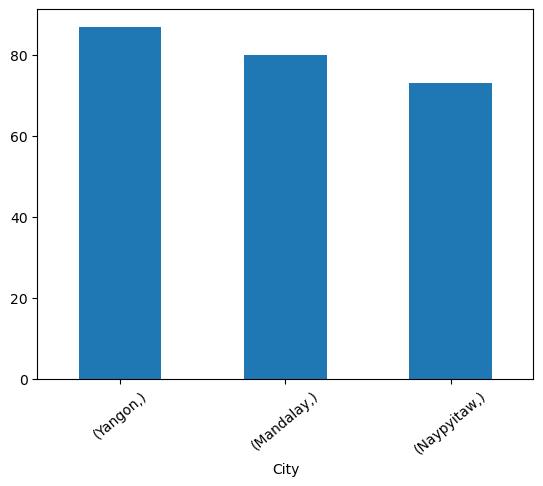

In [29]:
data_male_member_value.plot.bar(x = 'City', y = data_male_member_value, rot = 40)
plt.show()

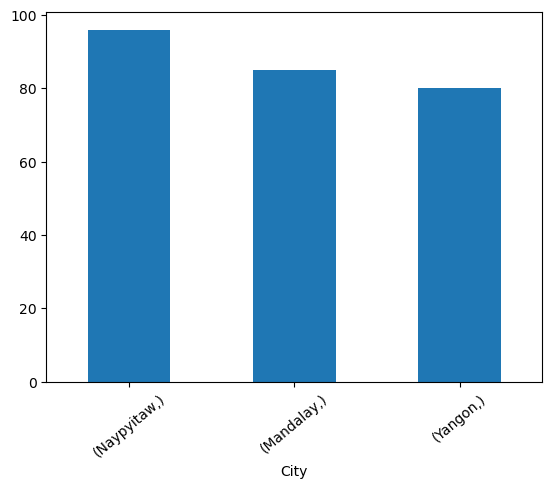

In [30]:
data_female_member_value.plot.bar(x = 'City', y = data_female_member_value, rot = 40)
plt.show()

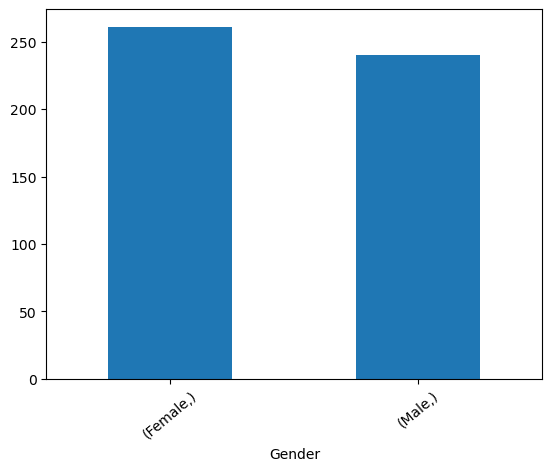

In [31]:
data_member_gender_value.plot.bar(x = 'Gender', y = data_member_gender_value, rot = 40)
plt.show()

### Berapa banyak dan produk apa saja yang gender female bertype member beli ?

In [32]:
data_product_female_member = data[
    (data['Gender'] == 'Female') &
    (data['Customer type'] == 'Member')
][['Gender', 'Customer type', 'Product line', 'Total']]
data_product_female_member

,Gender,Customer type,Product line,Total
0,Female,Member,Health and beauty,548.9715
6,Female,Member,Electronic accessories,433.6920
8,Female,Member,Health and beauty,76.1460
9,Female,Member,Food and beverages,172.7460
10,Female,Member,Fashion accessories,60.8160
...,...,...,...,...
969,Female,Member,Electronic accessories,181.0725
970,Female,Member,Food and beverages,888.6150
982,Female,Member,Sports and travel,921.1860
994,Female,Member,Electronic accessories,63.9975


In [33]:
data_product_female_member_value = data[
    (data['Gender'] == 'Female') &
    (data['Customer type'] == 'Member')
][['Product line']].value_counts()
data_product_female_member_value

Product line          
Food and beverages        51
Sports and travel         51
Fashion accessories       47
Home and lifestyle        47
Electronic accessories    35
Health and beauty         30
dtype: int64

In [34]:
data_product_female_member_mean = data[
    (data['Gender'] == 'Female') &
    (data['Customer type'] == 'Member') 
].groupby(['Product line'])['Total'].mean()
data_product_female_member_mean

Product line
Electronic accessories    318.672900
Fashion accessories       321.758649
Food and beverages        384.290324
Health and beauty         279.312950
Home and lifestyle        366.687702
Sports and travel         326.631735
Name: Total, dtype: float64

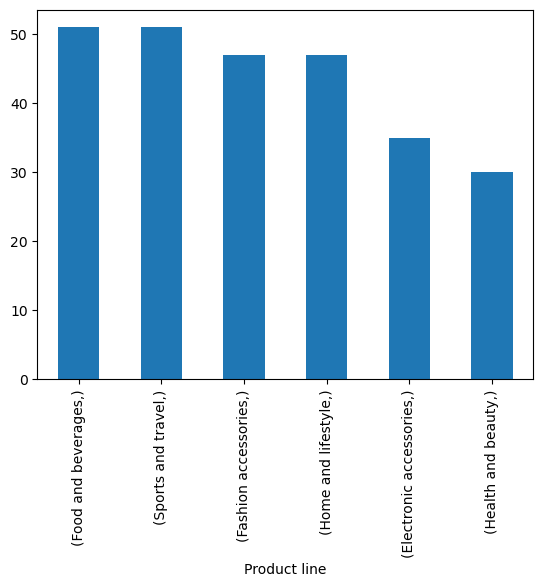

In [35]:
data_product_female_member_value.plot.bar(x = 'Product line', y = data_product_female_member_value, rot = 90)
plt.show()

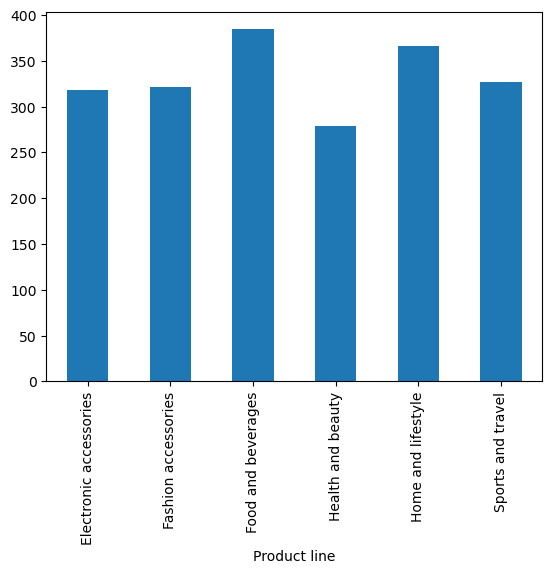

In [36]:
data_product_female_member_mean.plot.bar(x = 'Product line', y = data_product_female_member_mean, rot = 90)
plt.show()

### Dari hasil analisis di atas, apakah rata-rata pembelian gender female bertype member sama dengan rata-rata pembelian total?


In [37]:
data_total_mean = data['Total'].mean()
data_total_mean

322.966749

#### Measure of central tendency

In [38]:
data_product_female_member_mean_total = data_product_female_member['Total'].mean()
data_product_female_member_median_total = data_product_female_member['Total'].median()
data_product_female_member_mode_total = data_product_female_member['Total'].mode()

print('Rata-rata pembelian seluruh produk female member : ', data_product_female_member_mean_total)
print('Nilai tengah dari seluruh pembelian produk female member : ', data_product_female_member_median_total)
print('Nilai yang paling banyak muncul dari seluruh pembelian produk female member : ', data_product_female_member_mode_total)

Rata-rata pembelian seluruh produk female member :  337.72775287356325
Nilai tengah dari seluruh pembelian produk female member :  266.028
Nilai yang paling banyak muncul dari seluruh pembelian produk female member :  0     93.7440
1    189.0945
2    216.8460
Name: Total, dtype: float64


In [39]:
data_product_female_member_skewness_total = data_product_female_member['Total'].skew()
data_product_female_member_kurtosis_total = data_product_female_member['Total'].kurt()


print('Nilai skewness dari data pembelian seluruh produk female member :', data_product_female_member_skewness_total)
print('Nilai kurtosis dari data pembelian seluruh produk female member :', data_product_female_member_kurtosis_total)

Nilai skewness dari data pembelian seluruh produk female member : 0.8258619418349009
Nilai kurtosis dari data pembelian seluruh produk female member : -0.29355988622656515


#### Measure of variance

In [40]:
data_range = data_product_female_member['Total'].max() - data_product_female_member['Total'].min()
data_var = data_product_female_member['Total'].var()
data_std = data_product_female_member['Total'].std()
data_quantile = data_product_female_member['Total'].quantile([0.25, 0.5, 0.75])

print('Nilai range :', data_range)
print('Nilai variance :', data_var)
print('Nilai Standard deviation :', data_std)
print('Nilai quantile : ', data_quantile)

Nilai range : 1029.4830000000002
Nilai variance : 66868.34758783193
Nilai Standard deviation : 258.5891482406637
Nilai quantile :  0.25    118.9020
0.50    266.0280
0.75    506.6355
Name: Total, dtype: float64


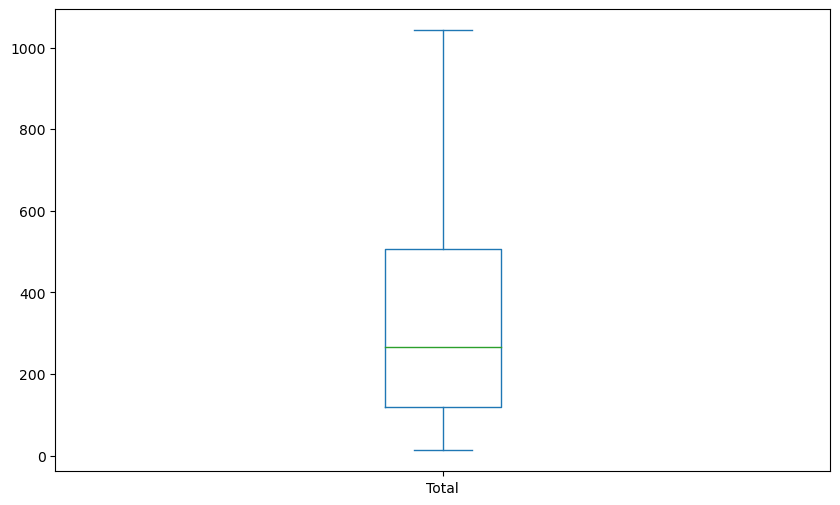

In [41]:
data_product_female_member['Total'].plot(kind='box', figsize=(10, 6))
plt.show()

In [42]:
Q1= data_product_female_member.Total.quantile(0.25)
Q3= data_product_female_member.Total.quantile(0.75)

IQR= Q3-Q1

lower_limit= Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR
lower_limit, upper_limit

(-462.69825, 1088.2357499999998)

In [43]:
outlier_iqr= data_product_female_member[(data_product_female_member.Total > upper_limit) | (data_product_female_member.Total < lower_limit)]
outlier_iqr

,Gender,Customer type,Product line,Total


#### Hypothesis testing

Our hypothesis on this case:

**H0: μ total member female = μ total customer all type and gender**

**H1: μ total member female != μ total customer all type and gender**

In [44]:
data_total_mean

322.966749

In [45]:
t_stat,p_val = stats.ttest_1samp(data_product_female_member.Total, data_total_mean)
print('P-value:',p_val) 
print('t-statistics:',t_stat)

P-value: 0.3572784040547614
t-statistics: 0.9222015593311994


## Conclusions, Assumptions, Overall Analysis

- Saya ingin mencari tahu bagaimana pengaruh dari keanggotaan seorang customer dan dari gender manakah yang berpengaruh terhadap pembelian di supermarket
- Dari data yang diberikan diketahui bahwa customer dengan type member memiliki rata-rata pembelian sebesar : 327.791305, sedangkan customer bertype normal memiliki rata-rata pengeluaran sebesar : 318.122856
- Dari data tersebut juga diketahui bahwa para member paling banyak melakukan transaksi untuk produk Food and beverages dengan jumlah transaksi sebanyak 94 kali
- Setelah dilakukan analisis kembali diketahui bahwa jumlah gender dengan type member terbanyak terdapat pada gender female dengan jumlah : 261, sedangkan gender male berjumlah : 240
- Setelah diketahui bahwa customer bertype member yang memili pengeluaran terbanyak dan gender dengan type member paling banyak terdapat pada gender female, dilakukan kembali analisis untuk mengetahui berapa banyak pembelian serta produk apa saja yang paling banyak dibeli oleh gender female bertype member
- Didapati produk yang sering dibeli adalah Food and beverages dan Sports and travel, sedangkan rata-rata pemasukan terbesar terdapat pada produk Food and beverages
- Lalu dilakukan Hypothesis testing apakah rata-rata pembelian gender female bertype member sama dengan rata-rata pembelian total?
- Didapatkan hasil bahwa P-value memiliki nilai sebesar : 0.3572784040547631, krena P-value lebih besar dari 0.05, maka H0 gagal untuk ditolak, sehingga ada kemungkinan rata-rata pembelian gender female bertype member sama dengan rata-rata pembelian total.